In [1]:
%pylab inline
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


In [2]:
def kw(arr,t):
    if len(t) == 0:
        sys.exit('Please input a keyword')
    else:
        pass
    
    num = len(arr[:,0])
    ta = []
    for i in range(len(t)):
        ta.append(t[i])
    ta = array(ta)
    
    if len(where(ta == ':')[0])==1:
        if t == ':':
            b = arange(0,num,1)
            
        else:
            c = where(ta == ':')[0][0]
            A = [int(i) for i in ta[0:c]]
            
            if c ==0:
                B = [int(i) for i in ta[c+1:]]   
                ri = sum([B[i]*10**(len(B)-1-i) for i in range(len(B))])
                if len(where(arr[:,0] == ri)[0])>0:
                    ridx = where(arr[:,0] == ri)[0][0]+1
                    b = arange(0,ridx,1)
                    
                else:
                    sys.exit('list out of range')
                
            elif c == len(ta)-1:
                li = sum([A[i]*10**(len(A)-1-i) for i in range(len(A))])                
                if len(where(arr[:,0] == li)[0])>0: 
                    lidx = where(arr[:,0] == li)[0][0]
                    b = arange(lidx,num,1)
                else:
                    sys.exit('list out of range')
                
            else:
                li = sum([A[i]*10**(len(A)-1-i) for i in range(len(A))])
                B = [int(i) for i in ta[c+1:]]   
                ri = sum([B[i]*10**(len(B)-1-i) for i in range(len(B))])
            
                if len(where(arr[:,0] == li)[0])==1 and len(where(arr[:,0] == ri)[0])==1:
                    lidx = where(arr[:,0] == li)[0][0]
                    ridx = where(arr[:,0] == ri)[0][0]+1
                    b = arange(lidx,ridx,1)
                
                else:
                    sys.exit('list out of range')
                
    else:
        if t.isnumeric() == True:
            if len(where(arr[:,0] == int(t))[0])>0: 
                b  = where(arr[:,0] == int(t))[0]
            else:
                sys.exit('can not find the target element')
                    
        else:
            if len(t)>=2:
                
                if t[1] == '*':  
                    keyword = []
                    for i in range(len(arr[:,1])):
                        keyword.append(arr[:,1][i][0])
                    keyword = array(keyword)
                    
                    if len(where(keyword == t[0])[0])>0:
                        b  = where(keyword == t[0])[0]
                        
                    else:
                        sys.exit('can not find the target element')
                        
                        
                else:
                    if len(where(arr[:,1] == t )[0])>0: 
                        b  = where(arr[:,1] == t )[0]
                        
                    elif len(where(arr[:,2] == t)[0])>0: 
                        b  = where(arr[:,2] == t)[0]
            
                    else:
                        sys.exit('can not find the target element')
            else:
                sys.exit('Keyword too short')
    
    idx = arr[b,0]
    name = arr[b,1]
    key = arr[b,2]
    s  = arr[b,3]
    l = arr[b,4]
    sx = arr[b,5]
    sy = arr[b,6]
    sz = arr[b,7]
    
    return idx, name, key, s, l, sx, sy, sz

In [3]:
def rp(file,pt):
    tidx = file.find('-Spin')-1
    tn = file[tidx]     
    
    if tn == 'L':
        if pt == '+':
            p1 = 'IP'
            p2 = 'L-Rot'
        else:
            p1 = 'L-Rot'
            p2 = 'IP'
            
    elif tn == 'R':
        if pt == '+':
            p1 = 'R-Rot'
            p2 = 'IP'
            
        else:
            p1 = 'IP'
            p2 = 'R-Rot'
    else:
        sys.exit('wrong file name')
        
    return p1,p2

In [4]:
def pat(pt, idx, name, key, s, l, sx, sy, sz):
    
    if pt == 'e' or pt == 'electron' or pt== 'e-':
        pt = '-'
        idx = 7414-idx[::-1]
        name = name[::-1]
        key = key[::-1]
        s = 3016.315-s[::-1]
        l = l[::-1]
        sx = sx[::-1]
        sy = sy[::-1]
        sz = sz[::-1]
        
    elif pt == 'p' or pt =='positron' or pt =='e+':
        pt = '+'
        pass
    
    else:
        sys.exit('wrong particle type')
    
    return pt, idx, name, key, s, l, sx, sy, sz

In [5]:
def spdf(file,t,pt):
    
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    idx, name, key, s, l, sx, sy, sz = kw(arr,t)
    
    pt, idx, name, key, s, l, sx, sy, sz = pat(pt, idx, name, key, s, l, sx, sy, sz)

    pb=pd.DataFrame({'index':idx, 'name':name, 'key':key, 's (m)':s,\
                         'l (m)':l, 'spin.x':sx,'spin.y':sy,'spin.z':sz})
    pd.set_option('display.max_rows', None)
    display(pb)

In [6]:
def sp(file,t,pt):
    df = pd.read_fwf(file)
    arr =df.to_numpy()
    idx, name, key, s, l, sx, sy, sz = kw(arr,t) 
    
    if t ==':':
        t ='All'
    else:
        pass
    
    pt, idx, name, key, s, l, sx, sy, sz = pat(pt, idx, name, key, s, l, sx, sy, sz)
    
    p1,p2 = rp(file,pt)
        
    figure(figsize=(10, 8))
    plot(s,sx,'b-o',label = 'Sx')
    plot(s,sy,'g-o',label = 'Sy')
    plot(s,sz,'r-o',label = 'Sz')
    xlabel('s(m)',size = 25)
    ylabel('Spin Component',size = 25)
    title(r'Spin motion of $e^%s$ between the %s and the %s(%s)'%(pt,p1,p2,t),size =20)
    legend(loc='best')
    show()

In [7]:
spdf("L-Spin.txt",'IP','e+')

,index,name,key,s (m),l (m),spin.x,spin.y,spin.z
0,1,IP,Marker,0,0,-4.4677e-06,2.6796e-06,1


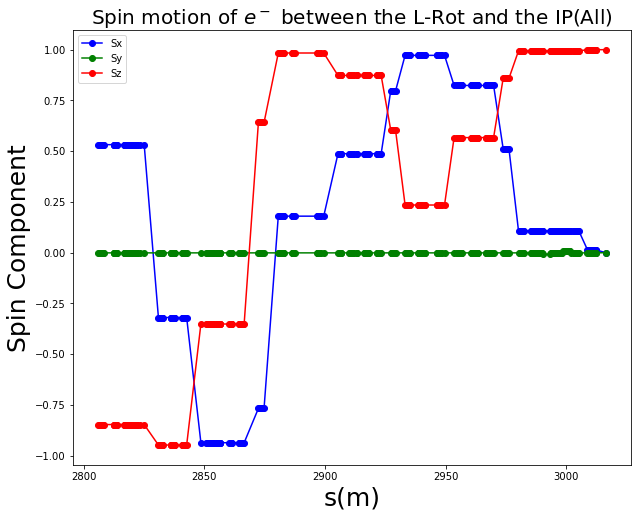

In [8]:
sp("L-Spin.txt",':','e')

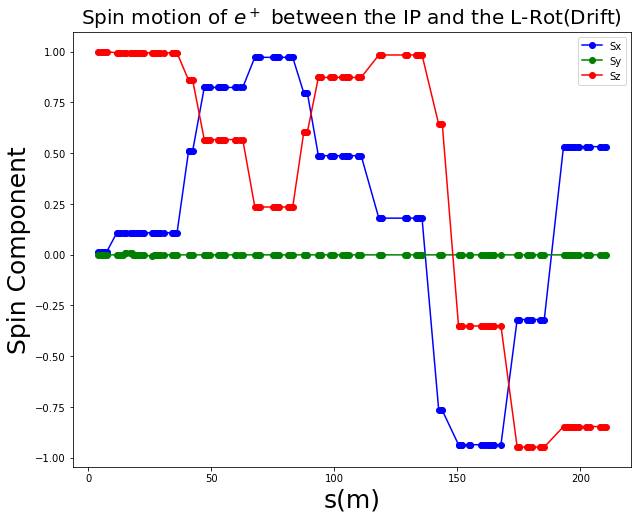

In [9]:
sp("L-Spin.txt",'Drift','e+')

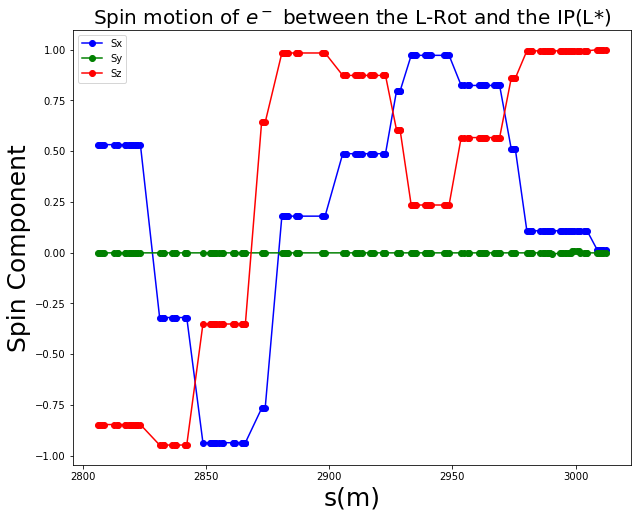

In [10]:
sp("L-Spin.txt",'L*','e')

In [11]:
%matplotlib notebook

In [12]:
def rsp(file,t,pt,d):
    tidx = file.find('-Spin')-1
    tn = file[tidx]    
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    idx, name, key, s, l, sx, sy, sz = kw(arr,t)    
    ptype, idx, name, key, s, l, sx, sy, sz = pat(pt, idx, name, key, s, l, sx, sy, sz)
    
    if t =='B*':
        se = array([sx,sz,sy])
        fig = figure(figsize=(12,10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(se[0], se[1], se[2], c='gold', marker='.')

        vec1 = array(se[0][::16])
        vec2 = array(se[1][::16])
        vec3 = array(se[2][::16])
        
        vec1 = append(vec1, se[0][-1])
        vec2 = append(vec2, se[1][-1])
        vec3 = append(vec3, se[2][-1])
        
        u = v = w = zeros(len(vec1))
        
        ax.quiver(u, v, w, vec1, vec2, vec3, color ='olive',alpha = 0.4)
        
        
        ax.set_xlim([min(vec1)-d, max(vec1)+d])
        ax.set_ylim([min(vec2)-d, max(vec2)+d])
        ax.set_zlim([min(vec3)-d, max(vec3)+d])
        
        ax.set_xlabel('X',fontsize=15)
        ax.set_ylabel('Z',fontsize=15)
        ax.set_zlabel('Y',fontsize=15)
        title(r'Spin Motion of $e ^%s$ in the %s-Rot Region'%(ptype,tn),size =20)
            
        show()
        
        figure(figsize=(10, 8))
        num = arange(1,len(sx)+1)
        plot(num,sx,'b-',label = 'Sx')
        plot(num,sy,'g-',label = 'Sy')
        plot(num,sz,'r-',label = 'Sz')
        xlabel('element number',size = 25)
        ylabel('Spin Component',size = 25)
        title(r'Spin Motion of $e ^%s$ in the %s-Rot Region'%(ptype,tn),size =20)
        legend(loc='best')
        show()
            
    else:
        if t ==':':
            t ='All'
        else:
            pass
        figure(figsize=(10, 8))
        plot(s,sx,'bo-',label = 'Sx')
        plot(s,sy,'go-',label = 'Sy')
        plot(s,sz,'ro-',label = 'Sz')
        xlabel('s(m)',size = 25)
        ylabel('Spin Component',size = 25)
        title(r'Spin Motion of $e ^%s$ in the %s-Rot Region (%s)'%(ptype,tn,t),size =20)
        legend(loc='best')
        show()

<IPython.core.display.Javascript object>


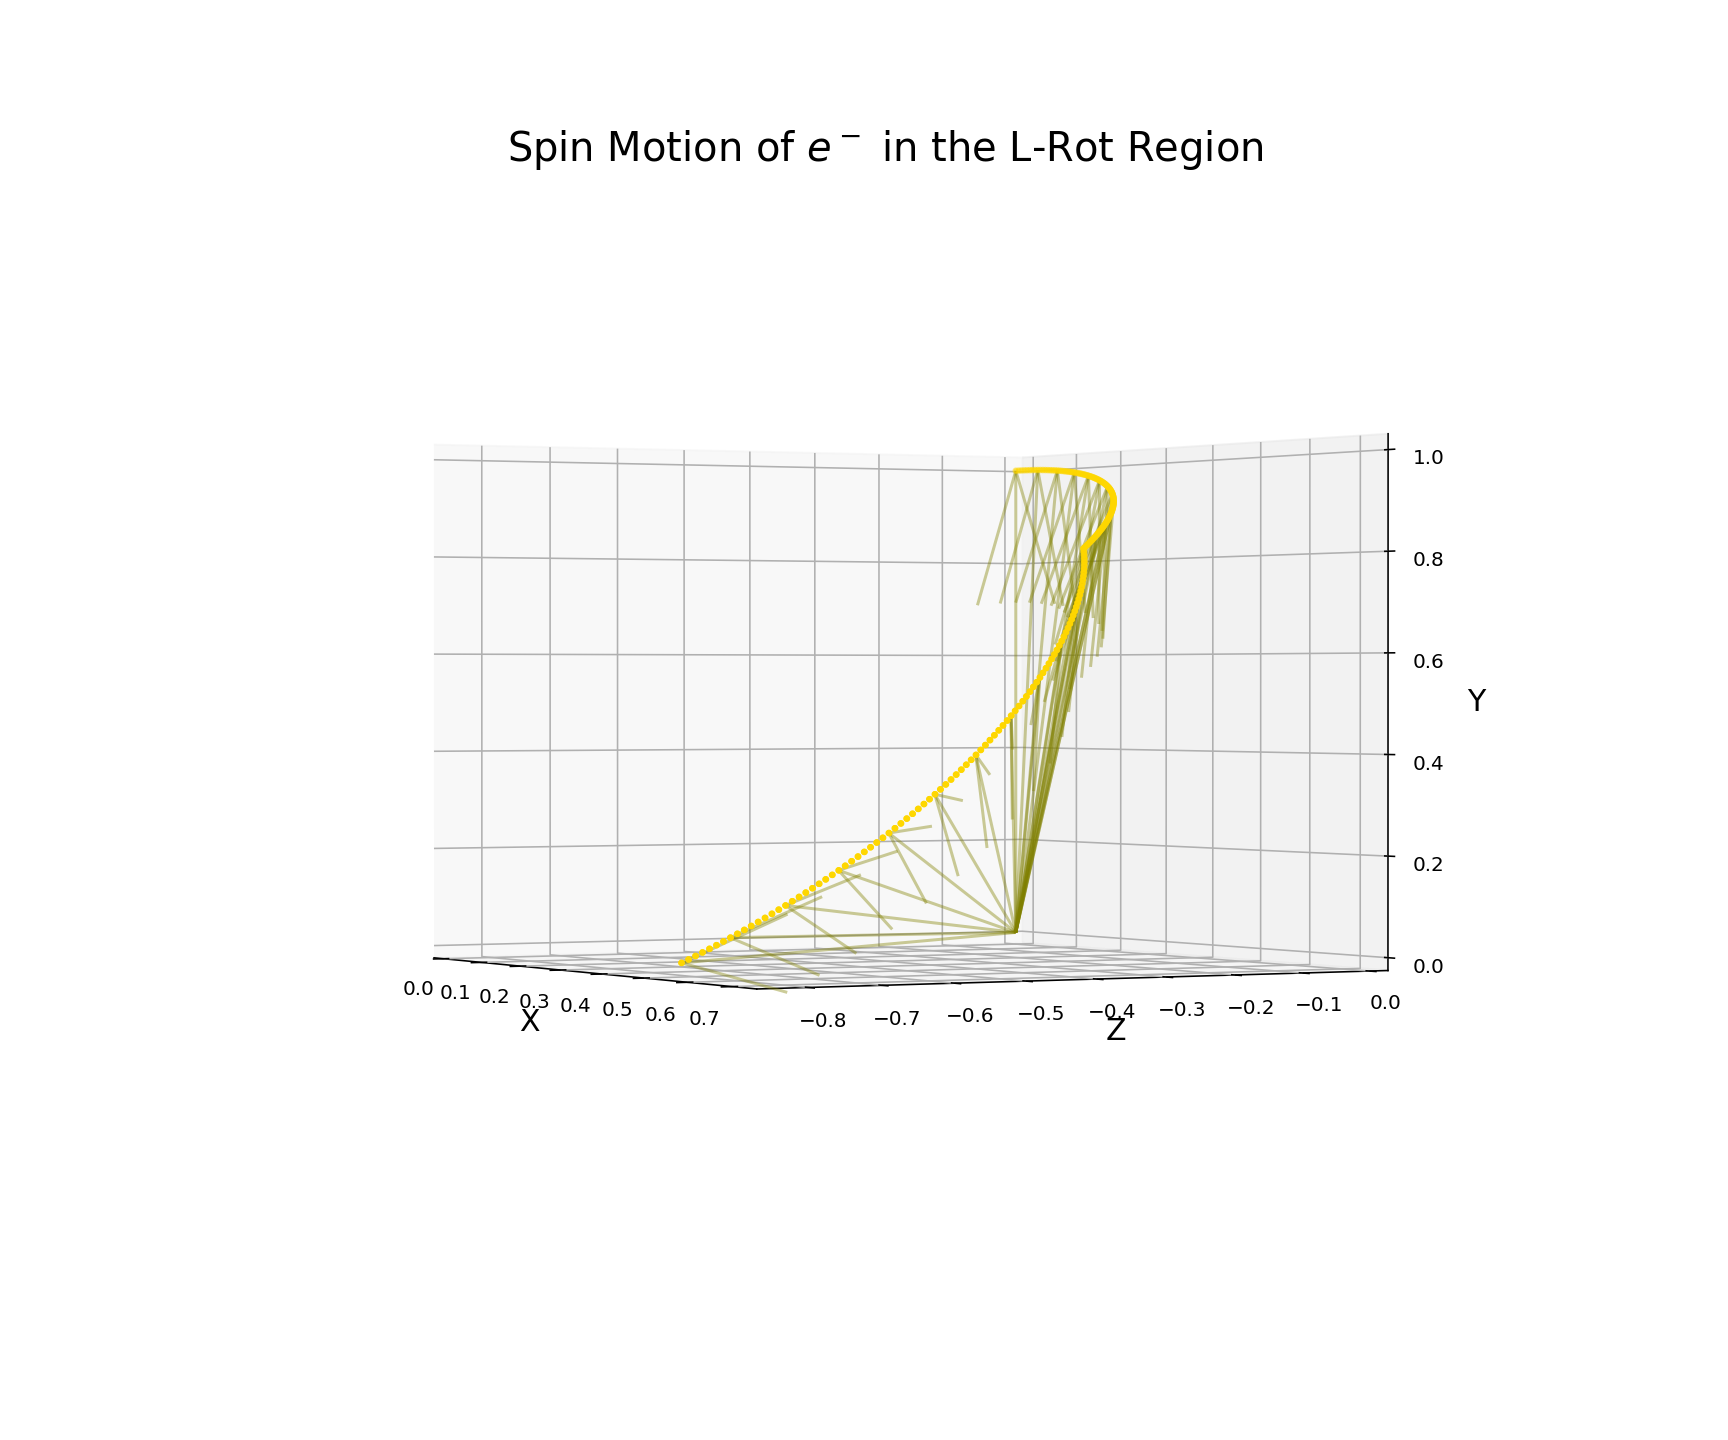

<IPython.core.display.Javascript object>


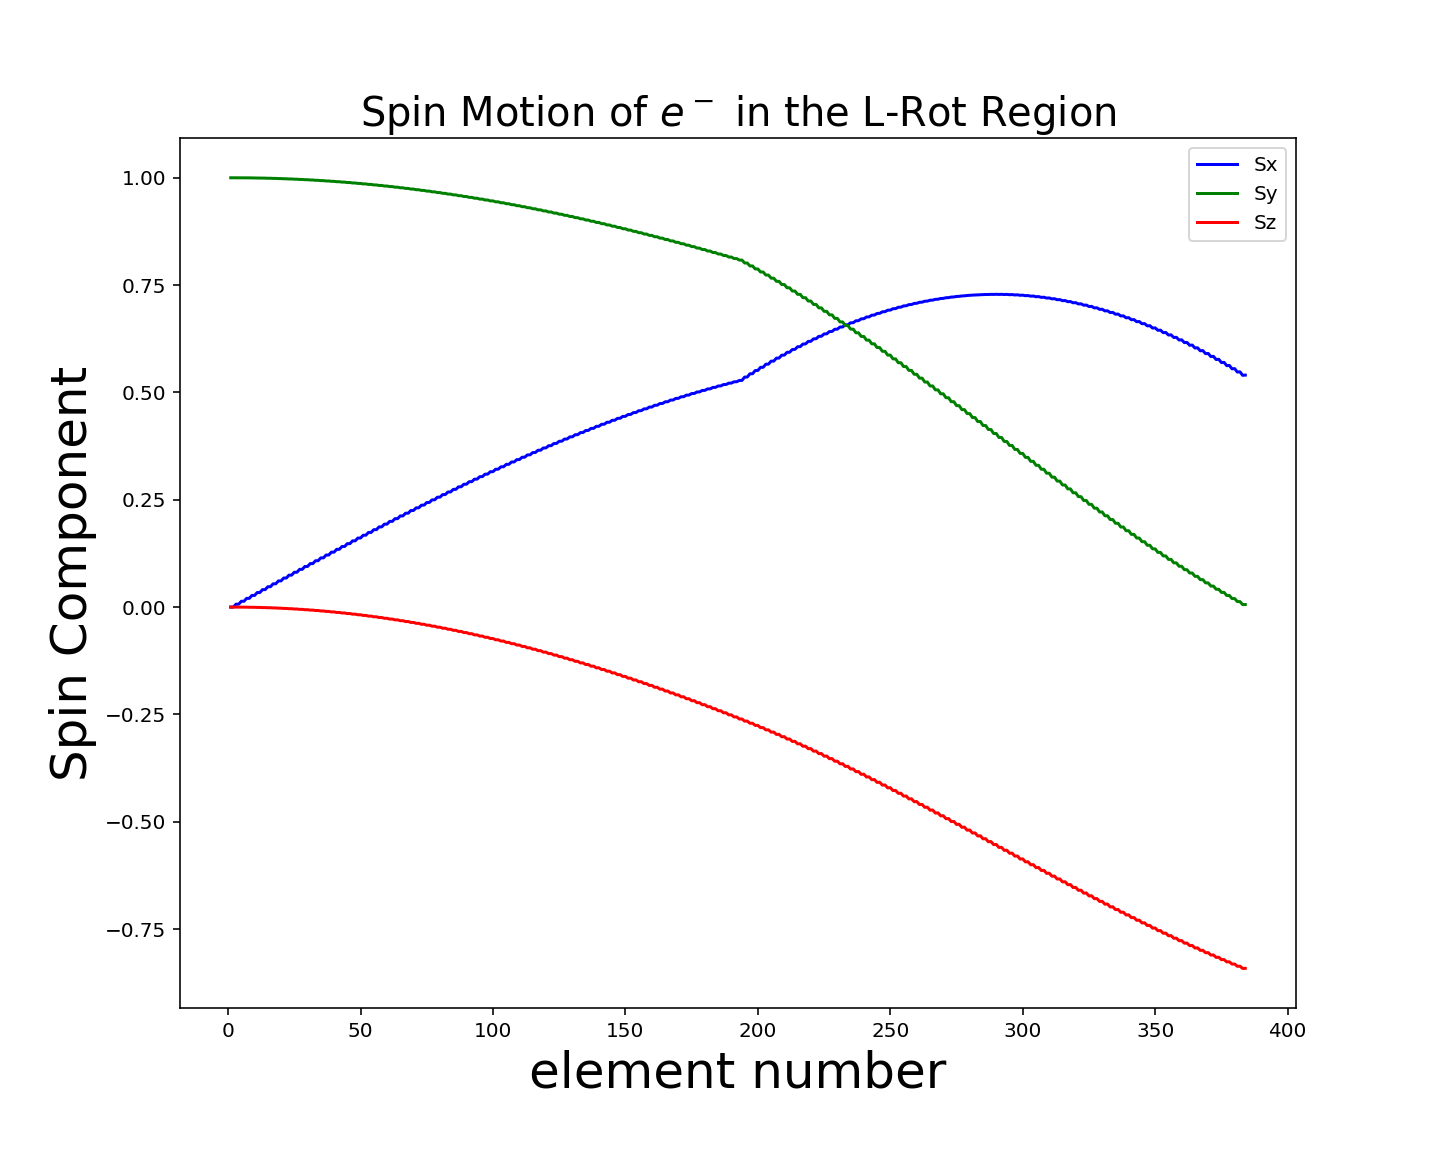

In [13]:
rsp("Rot-L-Spin.txt",'B*','e', 0.01)

<IPython.core.display.Javascript object>


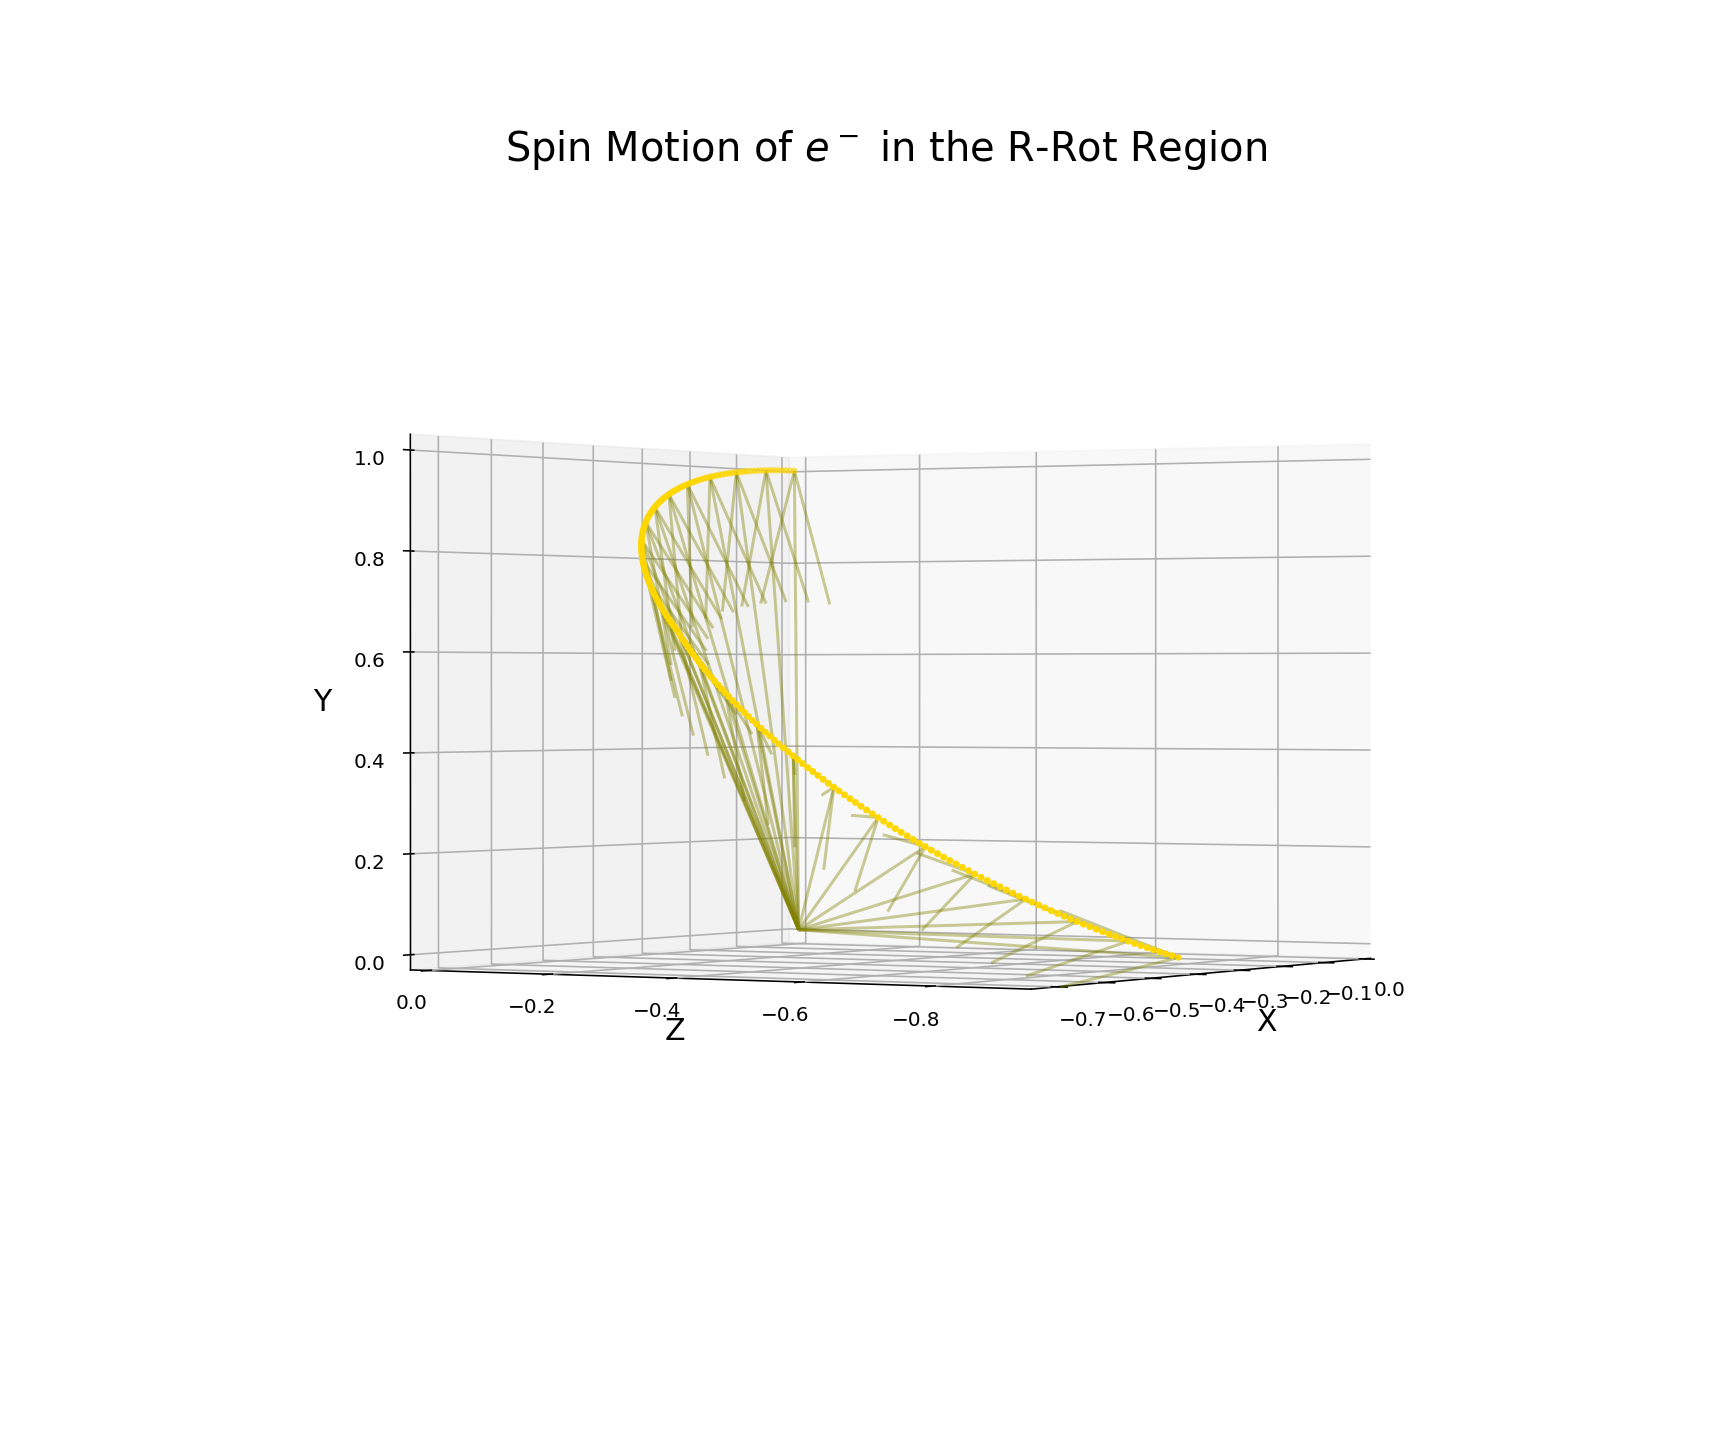

<IPython.core.display.Javascript object>


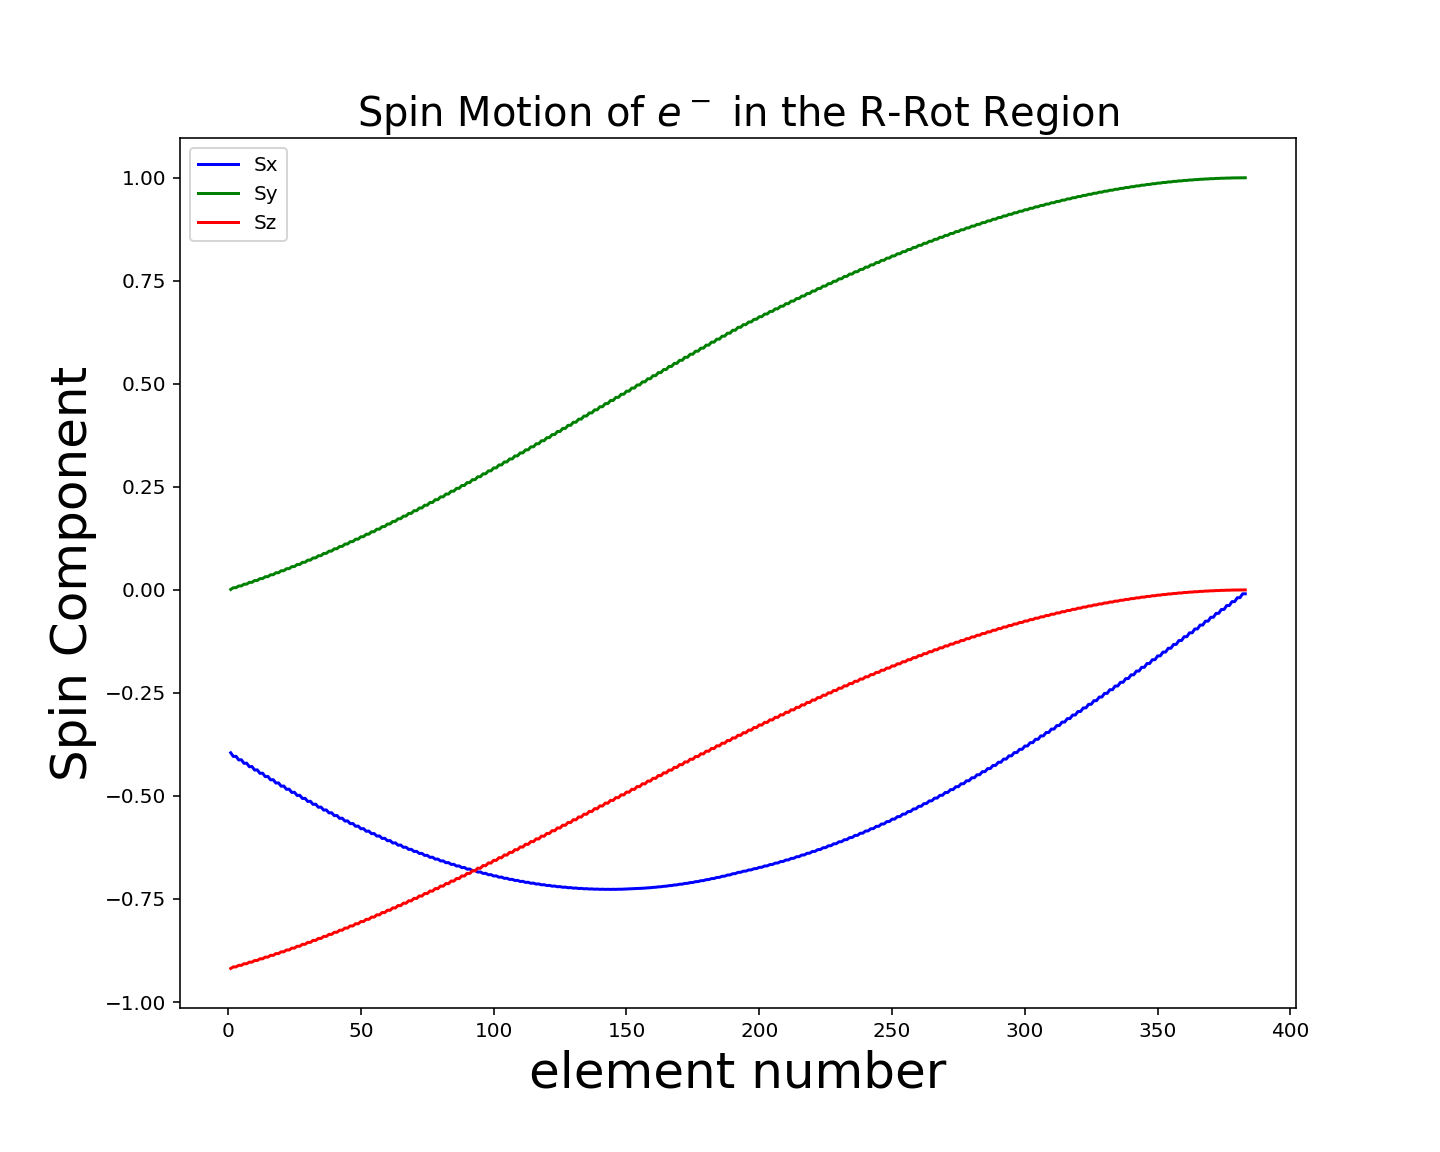

In [14]:
rsp("Rot-R-Spin.txt",'B*','e',0.01)